## 导入模块

In [1]:
import os.path
import torch
from torch import nn
import matplotlib.pyplot as plt

In [12]:
from nn import *
from load import load
from util import set_random_seeds, get_num_parameters, train

## 载入数据

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_random_seeds(seed = 0, device = device)

train_loader = load(train = True)
test_loader = load(train = False)

Files already downloaded and verified
Files already downloaded and verified


## 初始架构

In [4]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN original'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_original, test_error_original = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.46426	Test Error: 0.46610
Epoch:  2	Train Error: 0.39284	Test Error: 0.40720
Epoch:  3	Train Error: 0.34746	Test Error: 0.37080
Epoch:  4	Train Error: 0.30776	Test Error: 0.34930
Epoch:  5	Train Error: 0.29376	Test Error: 0.35000
Epoch:  6	Train Error: 0.26306	Test Error: 0.33230
Epoch:  7	Train Error: 0.22036	Test Error: 0.30660
Epoch:  8	Train Error: 0.20134	Test Error: 0.30160
Epoch:  9	Train Error: 0.19084	Test Error: 0.30770
Epoch: 10	Train Error: 0.16584	Test Error: 0.30770
Epoch: 11	Train Error: 0.15242	Test Error: 0.30270
Epoch: 12	Train Error: 0.13310	Test Error: 0.30720
Epoch: 13	Train Error: 0.12722	Test Error: 0.31080
Epoch: 14	Train Error: 0.10172	Test Error: 0.30940
Epoch: 15	Train Error: 0.09734	Test Error: 0.30760
Epoch: 16	Train Error: 0.09870	Test Error: 0.31590
Epoch: 17	Train Error: 0.06678	Test Error: 0.31460
Epoch: 18	Train Error: 0.05868	Test Error: 0.31480
Epoch: 19	Train Error: 0.05860	Test Error: 0.32420
Epoch: 20	Train Error: 0.06242	

In [13]:
print("Number of parameters:", get_num_parameters(model))

Number of parameters: 285162


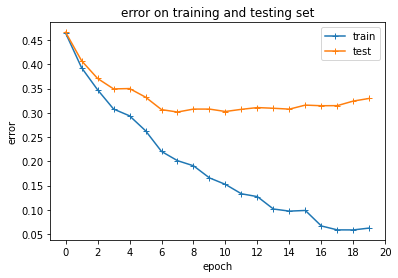

In [10]:
plt.plot(train_error_original, '-+')
plt.plot(test_error_original, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error on training and testing set')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 神经元数量调整

In [14]:
model = NN(hidden_channels = (4, 8), hidden_neurons = (32, 32))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN smaller'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_smaller, test_error_smaller = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.56712	Test Error: 0.56570
Epoch:  2	Train Error: 0.52376	Test Error: 0.52390
Epoch:  3	Train Error: 0.49590	Test Error: 0.49740
Epoch:  4	Train Error: 0.48050	Test Error: 0.48550
Epoch:  5	Train Error: 0.46458	Test Error: 0.47030
Epoch:  6	Train Error: 0.46180	Test Error: 0.47470
Epoch:  7	Train Error: 0.43794	Test Error: 0.45500
Epoch:  8	Train Error: 0.42918	Test Error: 0.44580
Epoch:  9	Train Error: 0.42394	Test Error: 0.44050
Epoch: 10	Train Error: 0.41632	Test Error: 0.43640
Epoch: 11	Train Error: 0.41192	Test Error: 0.43250
Epoch: 12	Train Error: 0.41512	Test Error: 0.43050
Epoch: 13	Train Error: 0.39754	Test Error: 0.42350
Epoch: 14	Train Error: 0.38868	Test Error: 0.41570
Epoch: 15	Train Error: 0.38494	Test Error: 0.41300
Epoch: 16	Train Error: 0.38624	Test Error: 0.41280
Epoch: 17	Train Error: 0.38194	Test Error: 0.41060
Epoch: 18	Train Error: 0.37920	Test Error: 0.40880
Epoch: 19	Train Error: 0.39170	Test Error: 0.41670
Epoch: 20	Train Error: 0.37472	

In [15]:
print("Number of parameters:", get_num_parameters(model))

Number of parameters: 18210


In [16]:
model = NN(hidden_channels = (64, 128), hidden_neurons = (512, 512))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN bigger'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_bigger, test_error_bigger = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.34022	Test Error: 0.36890
Epoch:  2	Train Error: 0.25568	Test Error: 0.30960
Epoch:  3	Train Error: 0.15532	Test Error: 0.26790
Epoch:  4	Train Error: 0.08938	Test Error: 0.26310
Epoch:  5	Train Error: 0.06042	Test Error: 0.26830
Epoch:  6	Train Error: 0.02886	Test Error: 0.26620
Epoch:  7	Train Error: 0.03278	Test Error: 0.27960
Epoch:  8	Train Error: 0.01704	Test Error: 0.27340
Epoch:  9	Train Error: 0.02214	Test Error: 0.27900
Epoch: 10	Train Error: 0.02302	Test Error: 0.28650
Epoch: 11	Train Error: 0.01574	Test Error: 0.27650
Epoch: 12	Train Error: 0.01422	Test Error: 0.27920
Epoch: 13	Train Error: 0.01478	Test Error: 0.27560
Epoch: 14	Train Error: 0.01156	Test Error: 0.27760
Epoch: 15	Train Error: 0.01284	Test Error: 0.28370
Epoch: 16	Train Error: 0.01016	Test Error: 0.28590
Epoch: 17	Train Error: 0.01112	Test Error: 0.27340
Epoch: 18	Train Error: 0.01032	Test Error: 0.27660
Epoch: 19	Train Error: 0.00978	Test Error: 0.27650
Epoch: 20	Train Error: 0.00998	

In [17]:
print("Number of parameters:", get_num_parameters(model))

Number of parameters: 4538250


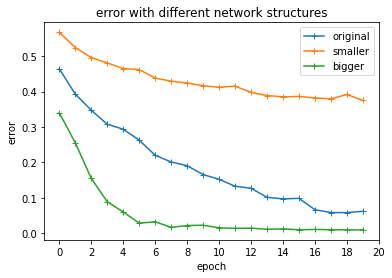

In [18]:
plt.plot(train_error_original, '-+')
plt.plot(train_error_smaller, '-+')
plt.plot(train_error_bigger, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['original', 'smaller', 'bigger'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different network structures')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 损失函数

In [19]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MultiMarginLoss()

root = '../Result/NN hinge'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_hinge, test_error_hinge = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.47478	Test Error: 0.47100
Epoch:  2	Train Error: 0.39966	Test Error: 0.41210
Epoch:  3	Train Error: 0.35528	Test Error: 0.37250
Epoch:  4	Train Error: 0.31880	Test Error: 0.35440
Epoch:  5	Train Error: 0.30490	Test Error: 0.34810
Epoch:  6	Train Error: 0.29750	Test Error: 0.34470
Epoch:  7	Train Error: 0.26048	Test Error: 0.33180
Epoch:  8	Train Error: 0.23006	Test Error: 0.31920
Epoch:  9	Train Error: 0.21676	Test Error: 0.31910
Epoch: 10	Train Error: 0.20512	Test Error: 0.32740
Epoch: 11	Train Error: 0.17606	Test Error: 0.31730
Epoch: 12	Train Error: 0.18196	Test Error: 0.32420
Epoch: 13	Train Error: 0.15332	Test Error: 0.32370
Epoch: 14	Train Error: 0.13478	Test Error: 0.32450
Epoch: 15	Train Error: 0.11732	Test Error: 0.31200
Epoch: 16	Train Error: 0.11272	Test Error: 0.32720
Epoch: 17	Train Error: 0.09168	Test Error: 0.31900
Epoch: 18	Train Error: 0.08184	Test Error: 0.31470
Epoch: 19	Train Error: 0.08724	Test Error: 0.32420
Epoch: 20	Train Error: 0.07886	

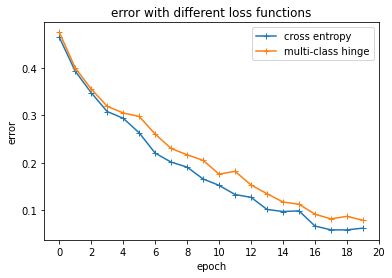

In [20]:
plt.plot(train_error_original, '-+')
plt.plot(train_error_hinge, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['cross entropy', 'multi-class hinge'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different loss functions')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 正则化

In [ ]:
weight_decay = (0.05, 0.01, 0.005, 0.0005, 0.00005)
train_error_regularize = [[], [], [], [], []]
test_error_regularize = [[], [], [], [], []]
for ind in (2, 3, 4):
    model = NN()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = weight_decay[ind])
    criterion = nn.MultiMarginLoss()

    root = '../Result/NN regularize ' + str(weight_decay[ind]) 
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lambda =', weight_decay[ind])
    _, train_error_regularize[ind], train_error_regularize[ind] = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device, 
              wrap_tqdms = False, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

lambda = 0.005
Epoch:  1	Train Error: 0.52090	Test Error: 0.52130
Epoch:  2	Train Error: 0.48012	Test Error: 0.48300
Epoch:  3	Train Error: 0.45488	Test Error: 0.45730
Epoch:  4	Train Error: 0.44808	Test Error: 0.45060
Epoch:  5	Train Error: 0.45272	Test Error: 0.45410
Epoch:  6	Train Error: 0.42502	Test Error: 0.42750
Epoch:  7	Train Error: 0.41172	Test Error: 0.42090
Epoch:  8	Train Error: 0.39998	Test Error: 0.40910
Epoch:  9	Train Error: 0.38158	Test Error: 0.39490
Epoch: 10	Train Error: 0.40000	Test Error: 0.41080
Epoch: 11	Train Error: 0.38968	Test Error: 0.40620
Epoch: 12	Train Error: 0.36532	Test Error: 0.37920
Epoch: 13	Train Error: 0.36512	Test Error: 0.37840
Epoch: 14	Train Error: 0.36016	Test Error: 0.37610
Epoch: 15	Train Error: 0.36242	Test Error: 0.37270
Epoch: 16	Train Error: 0.35954	Test Error: 0.37410
Epoch: 17	Train Error: 0.35582	Test Error: 0.37120
Epoch: 18	Train Error: 0.36568	Test Error: 0.37950
Epoch: 19	Train Error: 0.36030	Test Error: 0.37260
Epoch: 20	Train 

In [ ]:
plt.plot(train_error_original, '-+')
for ind in range(3):
    plt.plot(train_error_regularize[ind], '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['lambda = 0', 'lambda = 0.1', 'lambda = 0.05', 'lambda = 0.01'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different regularization parameters')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 激活函数

In [ ]:
model = NN_tanh()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN tanh'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_tanh, test_error_tanh = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

In [ ]:
model = NN_softplus()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN softplus'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_softplus, test_error_softplus = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

In [ ]:
plt.plot(train_error_original, '-+')
plt.plot(train_error_tanh, '-+')
plt.plot(train_error_softplus, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['ReLU', 'tanh', 'softmax'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different activation functions')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 优化器

In [ ]:
model = NN()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN SGD'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_SGD, test_error_SGD = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

In [ ]:
model = NN()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN momentum'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_momentum, test_error_momentum = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

In [ ]:
model = NN()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN Adagrad'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_error_Adagrad, test_error_Adagrad = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

In [ ]:
plt.plot(train_error_original, '-+')
plt.plot(train_error_SGD, '-+')
plt.plot(train_error_momentum, '-+')
plt.plot(train_error_Adagrad, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['Adam', 'SGD', 'SGD + momentum', 'Adagrad'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different optimizers')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()